In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

In [2]:
# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [3]:
df = pd.read_csv('value_stream_data_converted.csv')

In [4]:
df.head()

,Cutting Time (s),Cutting Speed (m/min),Feed Rate (mm/rev),Notch Wear (mm),Depth of Cut (mm),Plastic Deformation (mm),Flank Wear (mm),Crater Wear (mm),Surface Finish (µm),Tool Temperature (°C),Stress (MPa),Chip Formation (type),Machine Failure Rate
0,21.201266,108.389287,0.265559,0.034381,1.157511,0.093709,0.451100,0.093496,0.165913,426.070374,389.279667,2,0
1,41.586018,292.876658,0.122117,0.157197,6.064119,0.064535,0.238615,0.303177,1.802559,566.941272,920.150022,2,0
2,135.423972,326.923847,0.351837,0.127004,8.089253,0.040007,0.269784,0.123670,1.300452,279.372398,983.195460,1,0
3,284.403982,278.467372,0.184417,0.133014,7.762494,0.089427,0.372856,0.359558,0.424090,557.469620,969.074626,2,1
4,31.715770,282.918747,0.235795,0.056688,8.455264,0.065692,0.085733,0.164290,0.537721,362.465080,646.858516,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cutting Time (s)          10000 non-null  float64
 1   Cutting Speed (m/min)     10000 non-null  float64
 2   Feed Rate (mm/rev)        10000 non-null  float64
 3   Notch Wear (mm)           10000 non-null  float64
 4   Depth of Cut (mm)         10000 non-null  float64
 5   Plastic Deformation (mm)  10000 non-null  float64
 6   Flank Wear (mm)           10000 non-null  float64
 7   Crater Wear (mm)          10000 non-null  float64
 8   Surface Finish (µm)       10000 non-null  float64
 9   Tool Temperature (°C)     10000 non-null  float64
 10  Stress (MPa)              10000 non-null  float64
 11  Chip Formation (type)     10000 non-null  int64  
 12  Machine Failure Rate      10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [6]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Cutting Time (s),10000.0,155.540253,84.234111,10.007984,82.391644,155.678446,229.387757,299.960143
Cutting Speed (m/min),10000.0,272.251858,129.457912,50.025601,160.589068,270.354214,383.371183,499.964586
Feed Rate (mm/rev),10000.0,0.301804,0.115822,0.100039,0.200664,0.302640,0.402863,0.499962
Notch Wear (mm),10000.0,0.106606,0.054839,0.010003,0.059216,0.107132,0.154465,0.199998
Depth of Cut (mm),10000.0,5.241928,2.746606,0.500062,2.840438,5.202965,7.618485,9.998909
Plastic Deformation (mm),10000.0,0.055178,0.025872,0.010016,0.032922,0.055323,0.077276,0.099970
Flank Wear (mm),10000.0,0.254368,0.140904,0.010002,0.134380,0.253271,0.374002,0.499992
Crater Wear (mm),10000.0,0.206703,0.112585,0.010015,0.109876,0.208042,0.304810,0.399927
Surface Finish (µm),10000.0,1.050191,0.549801,0.100278,0.565151,1.050940,1.523415,1.999958
Tool Temperature (°C),10000.0,596.069818,231.811844,200.038936,392.497685,595.918966,799.341539,999.980023


In [7]:
df.replace("?",np.nan,inplace=True)

In [8]:
for column in df.columns:
    try:
        df[column]=df[column].astype(float)
    except:
        pass

In [9]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Cutting Time (s),10000.0,155.540253,84.234111,10.007984,82.391644,155.678446,229.387757,299.960143
Cutting Speed (m/min),10000.0,272.251858,129.457912,50.025601,160.589068,270.354214,383.371183,499.964586
Feed Rate (mm/rev),10000.0,0.301804,0.115822,0.100039,0.200664,0.302640,0.402863,0.499962
Notch Wear (mm),10000.0,0.106606,0.054839,0.010003,0.059216,0.107132,0.154465,0.199998
Depth of Cut (mm),10000.0,5.241928,2.746606,0.500062,2.840438,5.202965,7.618485,9.998909
Plastic Deformation (mm),10000.0,0.055178,0.025872,0.010016,0.032922,0.055323,0.077276,0.099970
Flank Wear (mm),10000.0,0.254368,0.140904,0.010002,0.134380,0.253271,0.374002,0.499992
Crater Wear (mm),10000.0,0.206703,0.112585,0.010015,0.109876,0.208042,0.304810,0.399927
Surface Finish (µm),10000.0,1.050191,0.549801,0.100278,0.565151,1.050940,1.523415,1.999958
Tool Temperature (°C),10000.0,596.069818,231.811844,200.038936,392.497685,595.918966,799.341539,999.980023


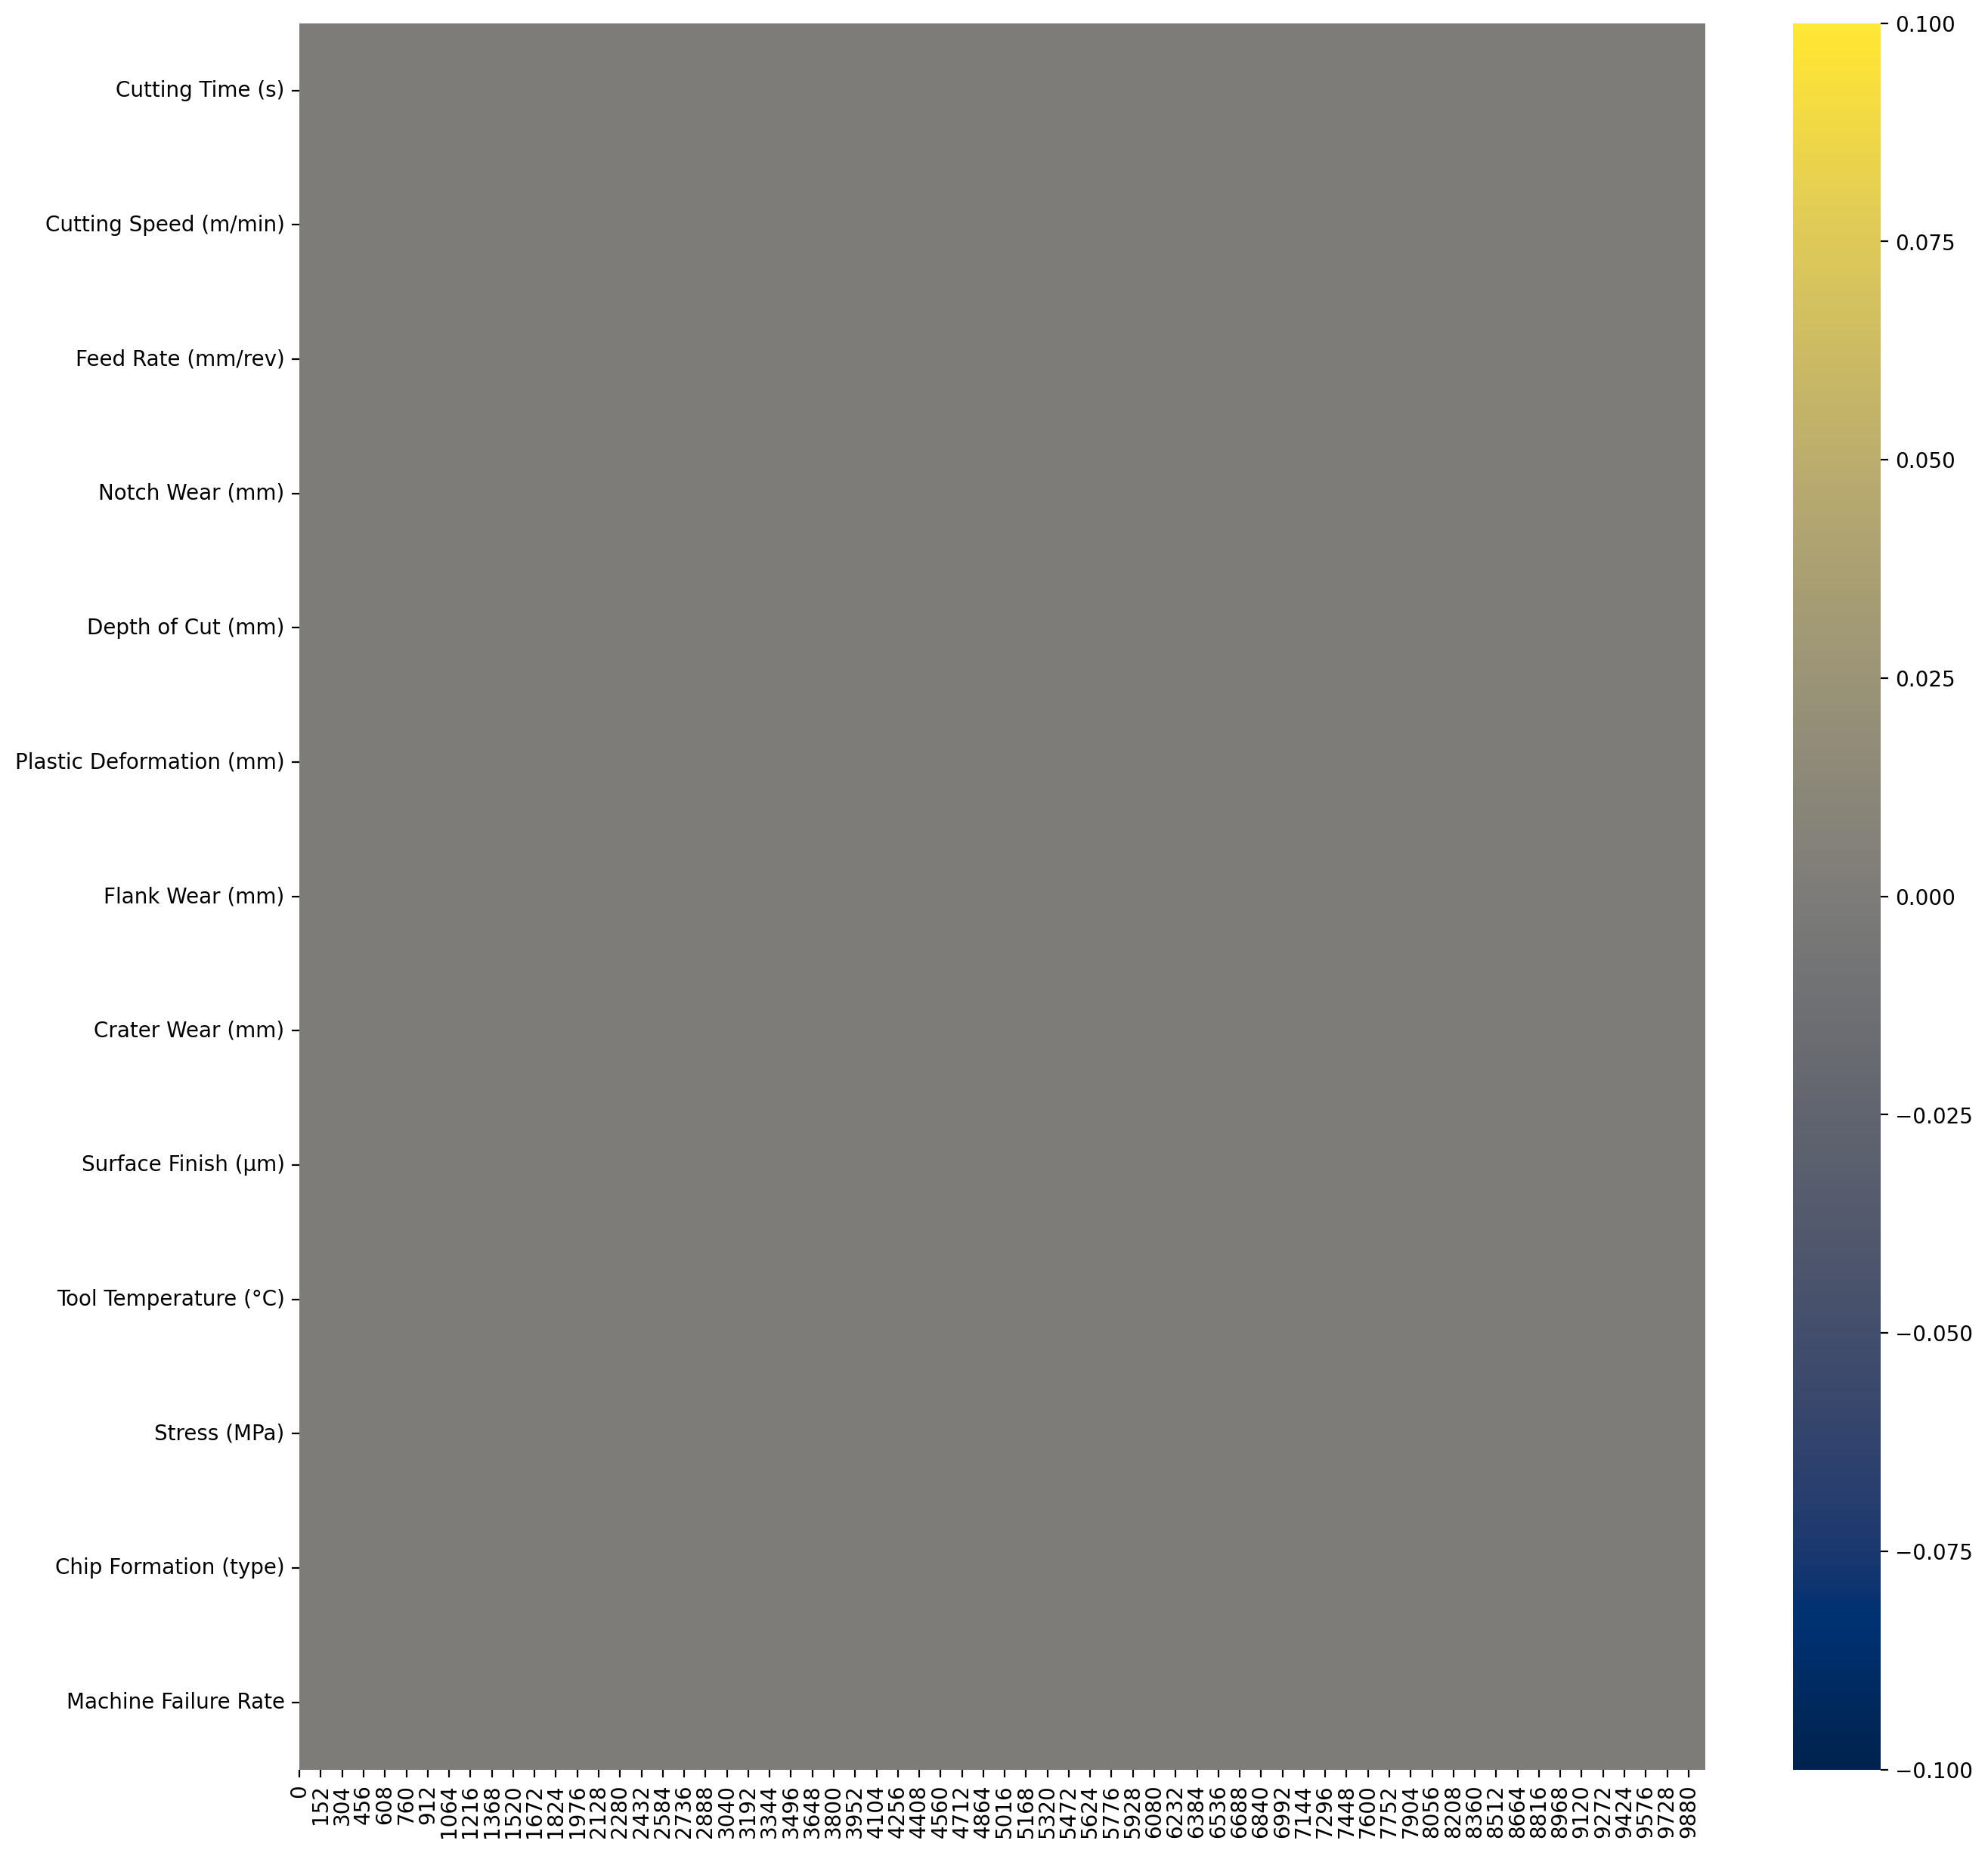

In [10]:
plt.figure(figsize=(15,15))
plot_kws={"s": 1}
sns.heatmap(df.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')

In [12]:
df.drop(['Chip Formation (type)'],axis=1,inplace=True)

In [13]:
list(df)

['Cutting Time (s)',
 'Cutting Speed (m/min)',
 'Feed Rate (mm/rev)',
 'Notch Wear (mm)',
 'Depth of Cut (mm)',
 'Plastic Deformation (mm)',
 'Flank Wear (mm)',
 'Crater Wear (mm)',
 'Surface Finish (µm)',
 'Tool Temperature (°C)',
 'Stress (MPa)',
 'Machine Failure Rate']

In [14]:
features = list(df.columns)

In [15]:
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

Cutting Time (s) - 0
Cutting Speed (m/min) - 0
Feed Rate (mm/rev) - 0
Notch Wear (mm) - 0
Depth of Cut (mm) - 0
Plastic Deformation (mm) - 0
Flank Wear (mm) - 0
Crater Wear (mm) - 0
Surface Finish (µm) - 0
Tool Temperature (°C) - 0
Stress (MPa) - 0
Machine Failure Rate - 0


In [18]:
df_group = df.groupby(['Machine Failure Rate'])
df_group.count()

,Cutting Time (s),Cutting Speed (m/min),Feed Rate (mm/rev),Notch Wear (mm),Depth of Cut (mm),Plastic Deformation (mm),Flank Wear (mm),Crater Wear (mm),Surface Finish (µm),Tool Temperature (°C),Stress (MPa)
Machine Failure Rate,,,,,,,,,,,
0.0,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974,8974
1.0,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026


In [19]:
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df[feature].fillna(df[feature].mean(),inplace=True)
    except:
        try:
            df[feature].fillna(df[feature].mode(),inplace=True)
        except:
            pass

In [20]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Cutting Time (s),10000.0,155.540253,84.234111,10.007984,82.391644,155.678446,229.387757,299.960143
Cutting Speed (m/min),10000.0,272.251858,129.457912,50.025601,160.589068,270.354214,383.371183,499.964586
Feed Rate (mm/rev),10000.0,0.301804,0.115822,0.100039,0.200664,0.302640,0.402863,0.499962
Notch Wear (mm),10000.0,0.106606,0.054839,0.010003,0.059216,0.107132,0.154465,0.199998
Depth of Cut (mm),10000.0,5.241928,2.746606,0.500062,2.840438,5.202965,7.618485,9.998909
Plastic Deformation (mm),10000.0,0.055178,0.025872,0.010016,0.032922,0.055323,0.077276,0.099970
Flank Wear (mm),10000.0,0.254368,0.140904,0.010002,0.134380,0.253271,0.374002,0.499992
Crater Wear (mm),10000.0,0.206703,0.112585,0.010015,0.109876,0.208042,0.304810,0.399927
Surface Finish (µm),10000.0,1.050191,0.549801,0.100278,0.565151,1.050940,1.523415,1.999958
Tool Temperature (°C),10000.0,596.069818,231.811844,200.038936,392.497685,595.918966,799.341539,999.980023


In [22]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))



In [23]:
Selected_Features = []
import statsmodels.api as sm


In [24]:
def backward_regression(X, y, initial_list=[], threshold_out=0.5, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X, y)

worst_feature : Plastic Deformation (mm), 0.9672116735207467 
worst_feature : Cutting Time (s), 0.8438297483944742 
worst_feature : Surface Finish (µm), 0.6491982331533318 
worst_feature : Feed Rate (mm/rev), 0.6399903529106723 

Selected Features:
['Cutting Speed (m/min)', 'Notch Wear (mm)', 'Depth of Cut (mm)', 'Flank Wear (mm)', 'Crater Wear (mm)', 'Tool Temperature (°C)', 'Stress (MPa)']


In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(10000, 11)

In [27]:
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = RandomOverSampler(random_state=0)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score,matthews_corrcoef

In [31]:



import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','time to train','time to predict','total time'])


In [32]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 15.6 ms
Wall time: 50.6 ms


In [33]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 89.75%
Recall: 89.75%
Precision: 80.55%
F1-Score: 84.90%
MCC: 0.00%
ROC AUC score: 53.47%
time to train: 0.05 s
time to predict: 0.00 s
total: 0.05 s


In [34]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 672 ms
Wall time: 1.17 s


In [35]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 80.40%
Recall: 80.40%
Precision: 81.37%
F1-Score: 80.88%
MCC: -1.28%
ROC AUC score: 49.33%
time to train: 1.16 s
time to predict: 0.00 s
total: 1.17 s


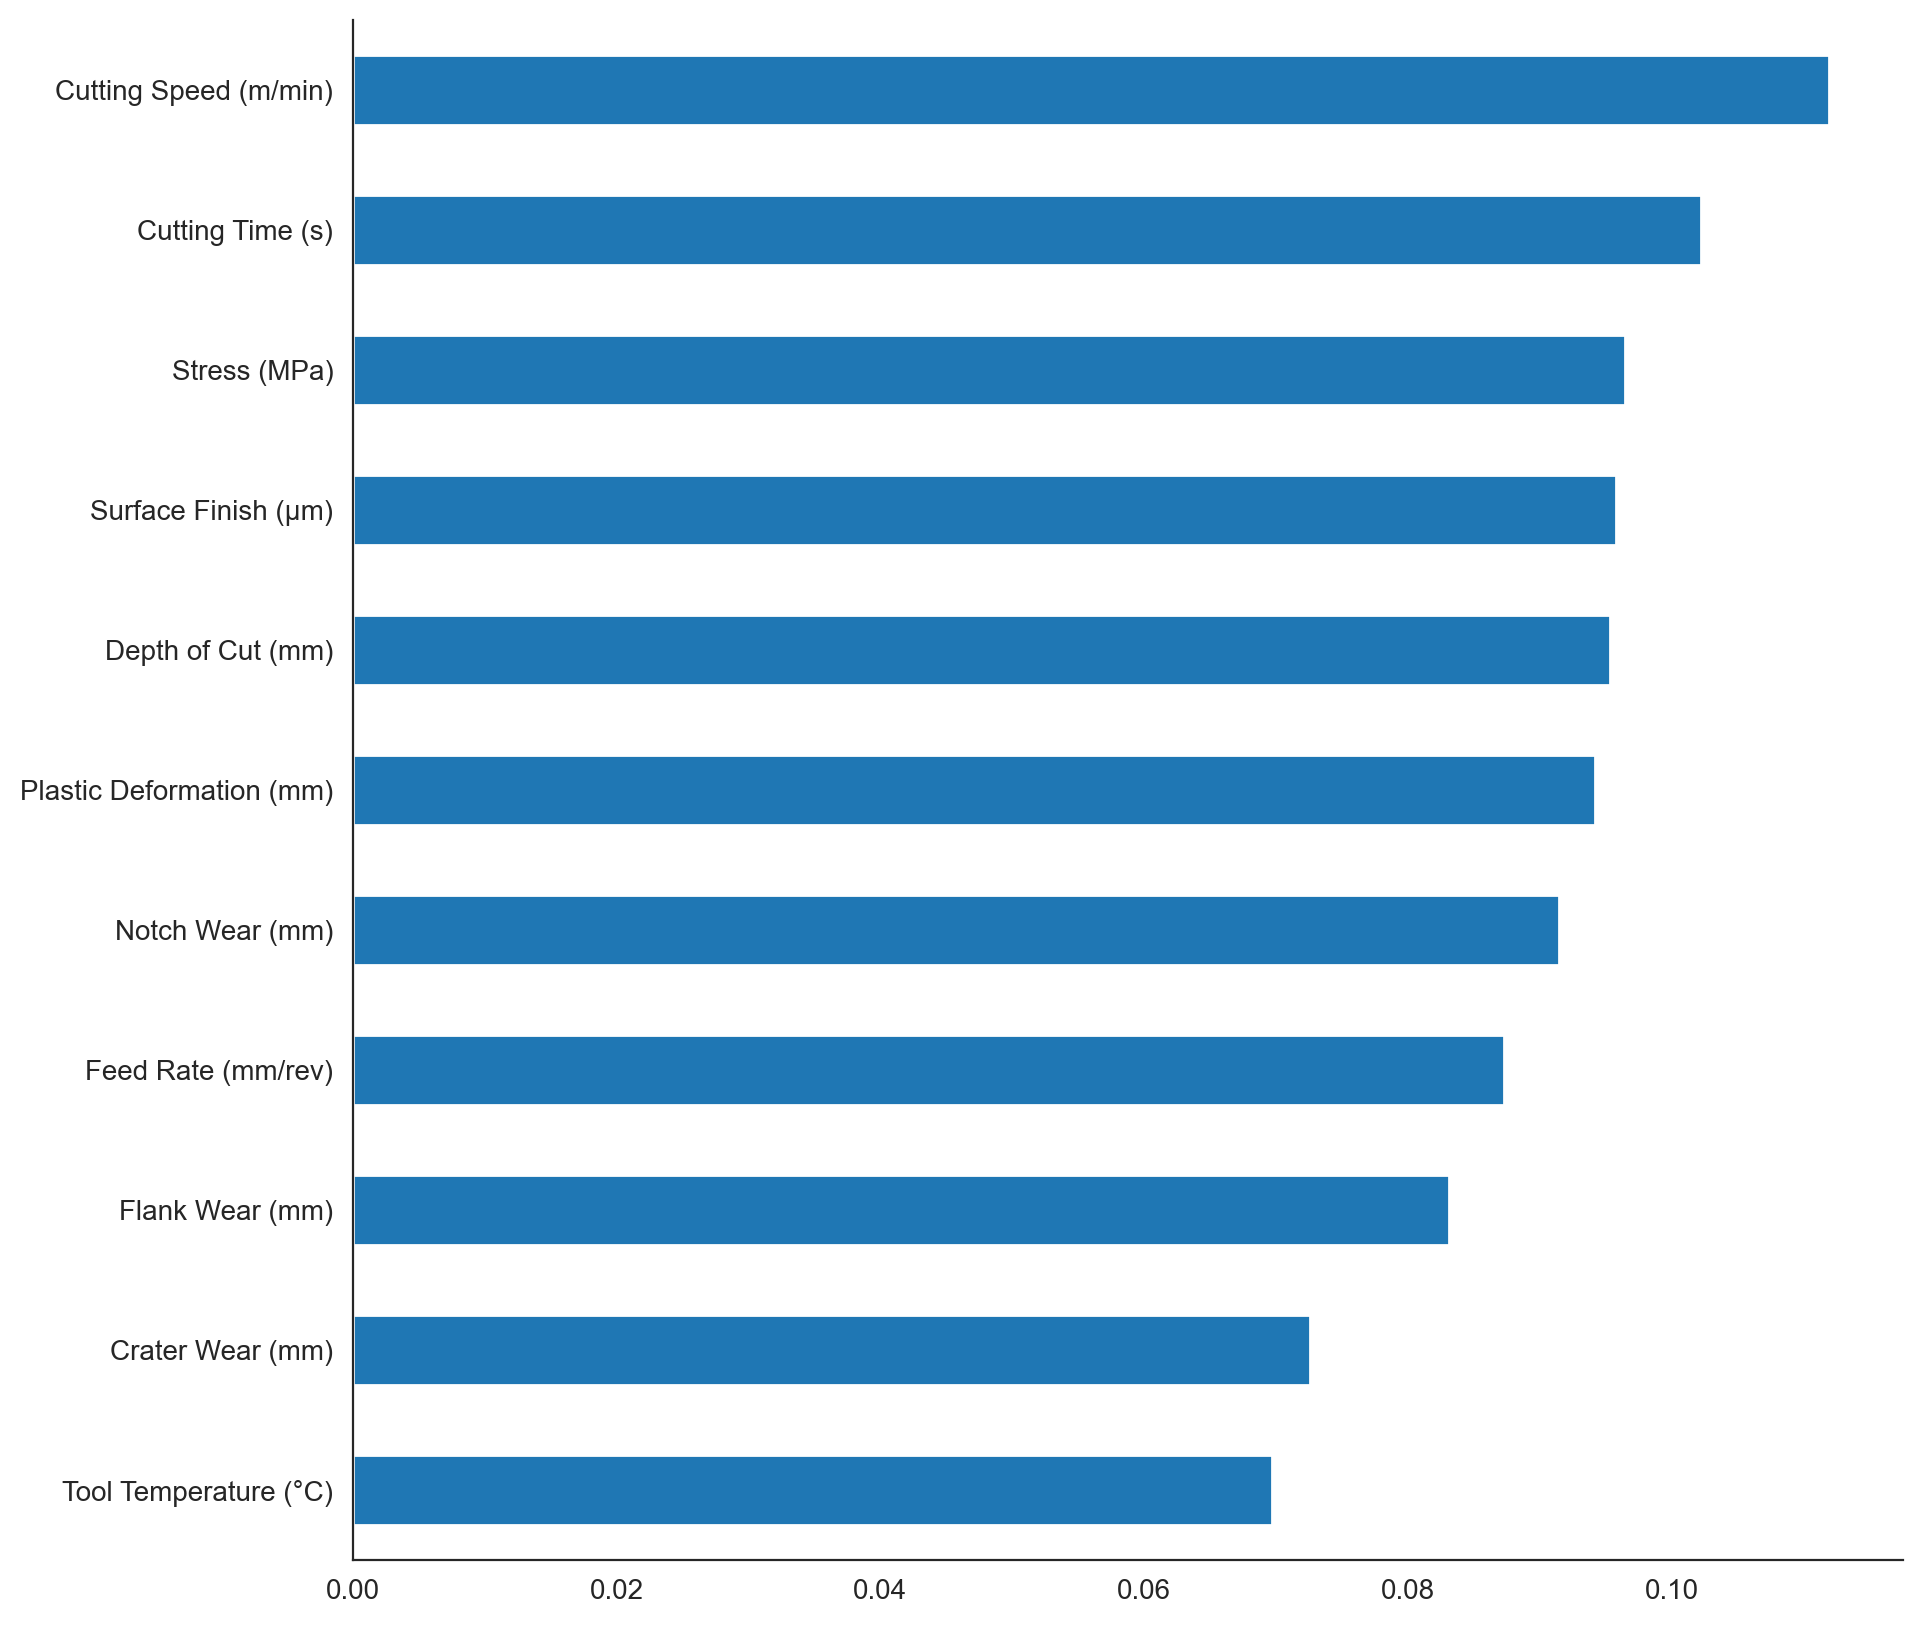

In [36]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [37]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 9.81 s
Wall time: 2.01 s


In [38]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 89.75%
Recall: 89.75%
Precision: 80.55%
F1-Score: 84.90%
MCC: 0.00%
ROC AUC score: 51.56%
time to train: 1.95 s
time to predict: 0.06 s
total: 2.01 s


In [39]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 5.09 s
Wall time: 9.64 s


In [40]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 89.65%
Recall: 89.65%
Precision: 80.54%
F1-Score: 84.85%
MCC: -1.07%
ROC AUC score: 50.06%
time to train: 9.64 s
time to predict: 0.00 s
total: 9.64 s


In [41]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (100,100,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 9.44 s
Wall time: 20.6 s


In [42]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Neural Network MLP'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 89.75%
Recall: 89.75%
Precision: 80.55%
F1-Score: 84.90%
MCC: 0.00%
ROC AUC score: 51.16%
time to train: 20.61 s
time to predict: 0.01 s
total: 20.62 s


In [43]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,time to train,time to predict,total time
Logistic,89.75%,89.75%,80.55%,84.90%,0.00%,0.0,0.0,0.1
Decision Tree,80.40%,80.40%,81.37%,80.88%,-1.28%,1.2,0.0,1.2
Random Forest,89.75%,89.75%,80.55%,84.90%,0.00%,2.0,0.1,2.0
Gradient Boosting Classifier,89.65%,89.65%,80.54%,84.85%,-1.07%,9.6,0.0,9.6
Neural Network MLP,89.75%,89.75%,80.55%,84.90%,0.00%,20.6,0.0,20.6
